# Generation of tables and figures

In [1]:
import pickle

v_acc_d = {}

f = open('results/RfamNovel_constant.pckl', 'rb')
v_acc_d.update({'Constant' : pickle.load(f)})
f.close()

f = open('results/RfamNovel_random.pckl', 'rb')
v_acc_d.update({'Random' : pickle.load(f)})
f.close()

f = open('results/Rfam2Novel_new.pckl', 'rb')
v_acc_d.update({'New' : pickle.load(f)})
f.close()

import numpy as np
from tensorflow import keras
from sklearn import preprocessing


train_labels=np.load("train_labels.npy")
val_labels=np.load("val_labels.npy")
test_labels=np.load("test_labels.npy")

num_classes = len(np.unique(train_labels))

le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_num = le.transform(train_labels)
val_labels_num = le.transform(val_labels)
test_labels_num = le.transform(test_labels)

train_labels_bin = keras.utils.to_categorical(train_labels_num, num_classes)
val_labels_bin = keras.utils.to_categorical(val_labels_num, num_classes)
test_labels_bin = keras.utils.to_categorical(test_labels_num, num_classes)





/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

### Plots the accuracy/MCC vs boundary noise

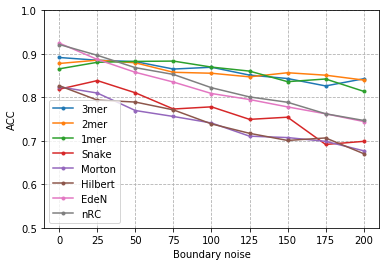

In [4]:
# plots accuracy or MCC VS bnoise
from sklearn.metrics import *
from utils.ExpConfiguration import *
from math import sqrt

import matplotlib.pyplot as plt
y_true = np.argmax(test_labels_bin, axis=1)

# CHANGE HERE plot parameters
nl=3  # cnn layer to plot
#padd = 'Constant'
#padd = 'Random'
padd = 'New' 
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score
#pmetric = 'F1'
#def f11_score(x,y): 
#    return f1_score(x,y,average='macro')

#pmetricf = f11_score
#pmetric = 'KAPPA'
#pmetricf = cohen_kappa_score

v_acc = v_acc_d[padd]
fig, ax = plt.subplots()
plt.xlabel('Boundary noise')
plt.ylabel(pmetric)
#plt.title('CNN n. layers = '+str(nl))
plt.ylim(0.5, 1) 
for en in seqEncoders:
    mtr=[]
    mtrErr=[]
    for bn in bnoise:
        y_pred = v_acc[str(nl)][en['filename']][str(bn)]
        #print('%.3f' % interval)
        mtr.append(pmetricf(y_true,y_pred))
        #mtrErr.append(1.96 * sqrt( (pmetricf(y_true,y_pred) * (1 - pmetricf(y_true,y_pred))) / len(y_pred)))
        #print(en['filename'],bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))
            
    ax.plot(bnoise, mtr, label=en['filename'],marker='o',markersize=3)
    #ax.errorbar(bnoise, mtr, yerr=mtrErr)

# add Eden results
mtr=[]
for bn in bnoise:
    y_pred = np.loadtxt('eden/test_pred_eden_'+str(bn)+'.txt',dtype='str')
    y_true = np.loadtxt('eden/test_labels_eden_'+str(bn)+'.txt',dtype='str')
    mtr.append(pmetricf(y_true,y_pred))
    #mtr.append(accuracy_score(y_true,y_pred))
    #print('EdeN',bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))

ax.plot(bnoise, mtr, label='EdeN',marker='o',markersize=3)
# add nRC results
mtr=[]
for bn in bnoise:
    y_pred = np.loadtxt('nrc/test_pred_nrc_'+str(bn)+'.txt',dtype='str')
    y_true = np.loadtxt('nrc/test_labels_nrc_'+str(bn)+'.txt',dtype='str')
    mtr.append(pmetricf(y_true,y_pred))
    #print('nRC',bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))


ax.plot(bnoise, mtr, label='nRC',marker='o',markersize=3)
ax.legend()
ax.grid(linestyle='--')
plt.grid(True)
plt.savefig('figs/plot_bnoise-m'+pmetric+'_nl'+str(nl)+'_p'+padd+'.pdf')
plt.show()



### Plots accuracy with different padding schemas

In [ ]:
from sklearn.metrics import *
from ExpConfiguration import *
import matplotlib.pyplot as plt
import pandas as pd

# CHANGE HERE plot parameters
nl=3  # cnn layer to plot
bn = 0 # boundary noise
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score


y_true = np.argmax(test_labels_bin, axis=1)
index = ['New', 'Constant', 'Random']
cols = {}
colsErr = {}
for en in seqEncoders:
    y_pred = v_acc_d['New'][str(nl)][en['filename']][str(bn)]
    pnew = pmetricf(y_true,y_pred)
    pnewInt = 1.96 * sqrt( (pnew * (1 - pnew)) / len(y_pred))

    y_pred = v_acc_d['Constant'][str(nl)][en['filename']][str(bn)]
    pcns = pmetricf(y_true,y_pred)
    pcnsInt = 1.96 * sqrt( (pcns * (1 - pcns)) / len(y_pred))

    y_pred = v_acc_d['Random'][str(nl)][en['filename']][str(bn)]
    prnd = pmetricf(y_true,y_pred)
    prndInt = 1.96 * sqrt( (prnd * (1 - prnd)) / len(y_pred))

    errors = [pnewInt,pcnsInt,prndInt]
    performance = [pnew,pcns,prnd]
    cols.update({en['filename'] : performance})
    colsErr.update({en['filename'] : errors})



df = pd.DataFrame(cols, index=index)
dfErr = pd.DataFrame(colsErr, index=index)
ax = df.plot.bar(rot=0,ylim=(0.5,1),yerr=dfErr)
ax.grid(linestyle='--')
plt.grid(True)
ax.legend(loc='lower left')
#plt.title('Input padding symbol')
plt.ylabel('ACC')
plt.savefig('figs/plot-padding.pdf')




### Plots accuracy/MCC with different CNN n. of layers

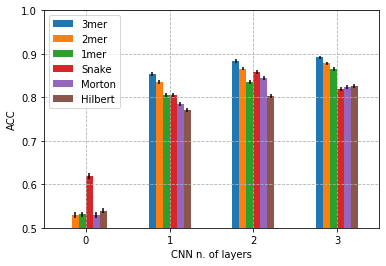

In [8]:
from sklearn.metrics import *
from utils.ExpConfiguration import *
import matplotlib.pyplot as plt
import pandas as pd

# CHANGE HERE plot parameters
bn = 0 # boundary noise
padd = 'New'  # padding to plot
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score


y_true = np.argmax(test_labels_bin, axis=1)
index = ['0', '1', '2','3']
cols = {}
colsErr = {}
for en in seqEncoders:
    y_pred = v_acc[str(0)][en['filename']][str(bn)]
    p0 = pmetricf(y_true,y_pred)
    p0E = 1.96 * sqrt( (p0 * (1 - p0)) / len(y_pred))
    y_pred = v_acc[str(1)][en['filename']][str(bn)]
    p1 = pmetricf(y_true,y_pred)
    p1E = 1.96 * sqrt( (p1 * (1 - p1)) / len(y_pred))

    y_pred = v_acc[str(2)][en['filename']][str(bn)]
    p2 = pmetricf(y_true,y_pred)
    p2E = 1.96 * sqrt( (p2 * (1 - p2)) / len(y_pred))

    y_pred = v_acc[str(3)][en['filename']][str(bn)]
    p3 = pmetricf(y_true,y_pred)
    p3E = 1.96 * sqrt( (p3 * (1 - p3)) / len(y_pred))

    
    performance = [p0,p1,p2,p3]
    errors = [p0E,p1E,p2E,p3E]
    cols.update({en['filename'] : performance})
    colsErr.update({en['filename'] : errors})



df = pd.DataFrame(cols, index=index)
dfErr = pd.DataFrame(colsErr, index=index)
ax = df.plot.bar(rot=0,ylim=(0.5,1),yerr=dfErr)
ax.grid(linestyle='--')
plt.grid(True)
ax.legend(loc='upper left')

#plt.title('CNN number of layers')
plt.ylabel('ACC')
plt.xlabel('CNN n. of layers')
plt.savefig('figs/plot-cnnlayers.pdf')



## Generates tables with precisions, recalls, and F1-measures

In [10]:
# tables precision recall f1 and macro/weighted averages 
# at certain bnoise and n CNN layers 

from sklearn.metrics import *
import pandas as pd
import numpy as np
from utils.ExpConfiguration import *

# CHANGE HERE plot parameters
nl=3  # cnn layer 
bn = 0 # boundary noise
padd = 'New'  # padding to plot

v_acc = v_acc_d[padd]
y_true = np.argmax(test_labels_bin, axis=1)
y_true = le.inverse_transform(y_true)

labels,lcounts = np.unique(y_true,return_counts=True)

dfs = {}
for en in seqEncoders:
    y_pred = v_acc[str(nl)][en['filename']][str(bn)]
    y_pred = le.inverse_transform(y_pred)
    clf1 = f1_score(y_true,y_pred,average=None,labels=labels)
    clf1=np.append(clf1,f1_score(y_true,y_pred,average='weighted'))
    clf1=np.append(clf1,f1_score(y_true,y_pred,average='macro'))
    clf1=np.append(clf1,f1_score(y_true,y_pred,average='micro'))
    dfs[en['filename']] = clf1

y_pred = np.loadtxt('eden/test_pred_eden_'+str(bn)+'.txt',dtype='str')
y_true = np.loadtxt('eden/test_labels_eden_'+str(bn)+'.txt',dtype='str')
clf1 = f1_score(y_true,y_pred,average=None,labels=labels)
clf1=np.append(clf1,f1_score(y_true,y_pred,average='weighted'))
clf1=np.append(clf1,f1_score(y_true,y_pred,average='macro'))
clf1=np.append(clf1,f1_score(y_true,y_pred,average='micro'))
dfs['EdeN'] = clf1

y_pred = np.loadtxt('nrc/test_pred_nrc_'+str(bn)+'.txt',dtype='str')
y_true = np.loadtxt('nrc/test_labels_nrc_'+str(bn)+'.txt',dtype='str')
clf1 = f1_score(y_true,y_pred,average=None,labels=labels)
clf1=np.append(clf1,f1_score(y_true,y_pred,average='weighted'))
clf1=np.append(clf1,f1_score(y_true,y_pred,average='macro'))
clf1=np.append(clf1,f1_score(y_true,y_pred,average='micro'))
dfs['nRC'] = clf1

dfs['Class size'] = np.append(lcounts,['-','-','-'])


labels = np.append(labels,['Weigthed avr','Macro avr','Accuracy'])
df = pd.DataFrame(dfs,index=labels)
#df = df.transpose()
#df.astype({('nRC','Class size'): 'int32'})

with open('tables/prf-table_bn'+str(bn)+'_nl'+str(nl)+'_p'+padd+'.tex','w') as tf:
    tf.write(df.to_latex(float_format="{:0.2f}".format))

df.to_excel('tables/SupplementalTableS1.xlsx',float_format="%.2f")
df


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,3mer,2mer,1mer,Snake,Morton,Hilbert,EdeN,nRC,Class size
RF00001,0.954265,0.945404,0.929721,0.920154,0.932282,0.918988,0.912135,0.899425,4179
RF00002,0.782609,0.644914,0.820513,0.501916,0.654822,0.627119,0.000000,0.000000,183
RF00003,0.888383,0.872727,0.828283,0.805825,0.783217,0.748899,0.000000,0.000000,229
RF00004,0.976736,0.968164,0.973258,0.965409,0.963199,0.944475,0.000000,0.000000,2913
RF00005,0.899068,0.921903,0.915399,0.783306,0.778707,0.890094,0.934906,0.932784,2524
RF00007,0.571429,0.382979,0.761905,0.333333,0.571429,0.320000,0.000000,0.000000,10
RF00012,0.598291,0.638655,0.341880,0.295652,0.325581,0.229167,0.000000,0.000000,78
RF00015,0.845283,0.842520,0.837398,0.752000,0.674897,0.728070,0.865217,0.898488,139
RF00016,0.136646,0.195402,0.101911,0.090323,0.104046,0.060241,0.779116,0.859504,146
RF00020,0.603878,0.592593,0.617886,0.559727,0.524496,0.548736,0.898876,0.880829,165


# Results with RNAGCN/nRC dataset and improved architecture

In [ ]:
import pickle

v_acc_d = {}

f = open('results/RNAGCN_nRC_ModelImproved_new.pckl', 'rb')
v_acc_d.update({'Improved' : pickle.load(f)})
f.close()

f = open('results/RNAGCN_nRC_new.pckl', 'rb')
v_acc_d.update({'Standard' : pickle.load(f)})
f.close()

import numpy as np
from tensorflow import keras
from sklearn import preprocessing

train_labels=np.load("dataset_nRC_train_labels.npy")
test_labels=np.load("dataset_nRC_test_labels.npy")

num_classes = len(np.unique(train_labels))
print('Total classes: ',num_classes)

le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_num = le.transform(train_labels)
test_labels_num = le.transform(test_labels)

train_labels_bin = keras.utils.to_categorical(train_labels_num, num_classes)
test_labels_bin = keras.utils.to_categorical(test_labels_num, num_classes)


In [ ]:
from sklearn.metrics import *
from ExpConfiguration import *
import matplotlib.pyplot as plt
import pandas as pd

# CHANGE HERE plot parameters
bn = 0 # boundary noise
padd = 'New'  # padding to plot
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score


y_true = np.argmax(test_labels_bin, axis=1)
index = ['Standard', 'Improved']
cols = {}
for en in seqEncoders:
    y_pred = v_acc_d['Standard'][en['filename']][str(bn)]
    p0 = pmetricf(y_true,y_pred)
    y_pred = v_acc_d['Improved'][en['filename']][str(bn)]
    p1 = pmetricf(y_true,y_pred)
    
    performance = [p0,p1]
    cols.update({en['filename'] : performance})



df = pd.DataFrame(cols, index=index)
df


## Results of rejection experiments

In [ ]:
# Rejection experiments figures and tables
import numpy as np
from tensorflow import keras
from sklearn import preprocessing

import pickle

v_acc_d = {}

f = open('results/RejectionExperiments_new.pckl', 'rb')
outdata = pickle.load(f)
f.close()

test_labels=np.load("test_labels.npy")
num_classes = len(np.unique(test_labels))
print('Total classes: ',num_classes)


le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_num = le.transform(test_labels)

test_labels_bin = keras.utils.to_categorical(test_labels_num, num_classes)

y_true = np.argmax(test_labels_bin, axis=1)
y_true = le.inverse_transform(y_true)
labels,lcounts = np.unique(y_true,return_counts=True)




In [ ]:
# Classification Improvement: Distance between two top probs

from sklearn.metrics import *
import pandas as pd
import numpy as np
from ExpConfiguration import *


df = pd.DataFrame(index=labels)

dfs = {}
for en in seqEncoders:
    idx=[]
    avrp_nornd = outdata[en['filename']]['avrp_nornd']
    orderp_nornd = outdata[en['filename']]['orderp_nornd']
    var_nornd = outdata[en['filename']]['var_nornd']
    
    for i in range(len(avrp_nornd)):
        l1 = avrp_nornd[i,orderp_nornd[i,0]] - 0.6*np.sqrt(var_nornd[i,orderp_nornd[i,0]])
        l2 = avrp_nornd[i,orderp_nornd[i,1]] + 0.6*np.sqrt(var_nornd[i,orderp_nornd[i,1]])
        D = l1 - l2
        if D>0:
            idx.append(i)

    y_true_rej = y_true[idx]
    y_pred = outdata[en['filename']]['y_pred']
    y_pred_rej = y_pred[idx]
    clf1 = f1_score(y_true_rej,y_pred_rej,average=None,labels=labels)
    #clf1=np.append(clf1,f1_score(y_true_rej,y_pred_rej,average='weighted'))
    #clf1=np.append(clf1,f1_score(y_true_rej,y_pred_rej,average='macro'))
    #clf1=np.append(clf1,f1_score(y_true_rej,y_pred_rej,average='micro'))
    dfs[en['filename']] = clf1

    labels_idx,lcounts_idx = np.unique(y_true[idx],return_counts=True)

    df[en['filename']] = 0
    
    df.loc[labels , en['filename']] = lcounts
    
    df.loc[labels_idx , en['filename']] = df.loc[labels_idx , en['filename']]-lcounts_idx
    
    df.loc[labels , en['filename']] = 100*df.loc[labels , en['filename']]/lcounts

    print(' & %s & %0.2f & %0.2f & %0.2f & %0.2f' % (en['filename'], accuracy_score(y_true_rej,y_pred_rej),
                                                                  cohen_kappa_score(y_true_rej,y_pred_rej),
                                                                  matthews_corrcoef(y_true_rej,y_pred_rej),
                                                                  100*(np.sum(lcounts)-np.sum(lcounts_idx))/np.sum(lcounts)))


dfD = pd.DataFrame(dfs,index=labels)
dfDrej = df

dfDrej.style.background_gradient(cmap='Blues')



In [ ]:
# Classification Improvement: Entropy

from sklearn.metrics import *
import pandas as pd
import numpy as np
from ExpConfiguration import *


df = pd.DataFrame(index=labels)

dfs = {}
for en in seqEncoders:
    idx=[]
    hp_nornd = outdata[en['filename']]['hp_nornd']
    
    for i in range(len(hp_nornd)):
        H = hp_nornd[i]
        if H < -np.log2(1/num_classes)/3:
            idx.append(i)

    y_true_rej = y_true[idx]
    y_pred = outdata[en['filename']]['y_pred']
    y_pred_rej = y_pred[idx]
    clf1 = f1_score(y_true_rej,y_pred_rej,average=None,labels=labels)
    #clf1=np.append(clf1,f1_score(y_true_rej,y_pred_rej,average='weighted'))
    #clf1=np.append(clf1,f1_score(y_true_rej,y_pred_rej,average='macro'))
    #clf1=np.append(clf1,f1_score(y_true_rej,y_pred_rej,average='micro'))
    dfs[en['filename']] = clf1

    labels_idx,lcounts_idx = np.unique(y_true[idx],return_counts=True)

    df[en['filename']] = 0
    
    df.loc[labels , en['filename']] = lcounts
    
    df.loc[labels_idx , en['filename']] = df.loc[labels_idx , en['filename']]-lcounts_idx
    
    df.loc[labels , en['filename']] = 100*df.loc[labels , en['filename']]/lcounts
    
    print(' & %s & %0.2f & %0.2f & %0.2f & %0.2f' % (en['filename'], accuracy_score(y_true_rej,y_pred_rej),
                                                                  cohen_kappa_score(y_true_rej,y_pred_rej),
                                                                  matthews_corrcoef(y_true_rej,y_pred_rej),
                                                                  100*(np.sum(lcounts)-np.sum(lcounts_idx))/np.sum(lcounts)))



dfH = pd.DataFrame(dfs,index=labels)
dfHrej = df

dfH.style.background_gradient(cmap='Blues')




In [ ]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(1, 2, constrained_layout=True)

fig.set_size_inches(9,9)
dff1 = dfH
df = dfHrej

c0 = ax0.imshow(dff1,cmap="Blues",vmax=1,vmin=0,aspect='auto')
c1 = ax1.imshow(df,cmap="Oranges",vmax=100,vmin=0,aspect='auto')

#ax0.get_yaxis().set_visible(False)


ax0.set_yticks(np.arange(len(dff1.index)))
ax0.set_yticklabels(dff1.index)
ax0.set_ylim(28.5,-0.5)

ax0.set_xticks(np.arange(len(dff1.columns)))
ax0.set_xticklabels(dff1.columns,fontsize=12)

ax1.get_yaxis().set_visible(False)
#ax1.set_yticks(np.arange(1,len(df.index)))
#ax1.set_yticklabels(df.index)
ax1.set_xticks(np.arange(len(df.columns)))
ax1.set_xticklabels(df.columns,fontsize=12)


fig.suptitle('Entropy Estimator', fontsize=16)

# Rotate the tick labels and set their alignment.
plt.setp(ax0.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax1.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax0.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax1.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor",verticalalignment='center')



#cax2 = ax1_divider.append_axes("top", size="7%", pad="2%")
#cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")
# change tick position to top. Tick position defaults to bottom and overlaps
# the image.
#cax2.xaxis.set_ticks_position("top")

#c = ax1.pcolor(df)
cbar1 = fig.colorbar(c0, ax=ax0,cmap='Blues',location='top')
cbar1.set_label('F1-measure', rotation=0, fontsize=12)
cbar2 = fig.colorbar(c1, ax=ax1,cmap='Oranges',location='top')
cbar2.set_label('% of rejected samples', rotation=0, fontsize=12)



plt.savefig('figs/plot_rej_improvement_H.pdf')
plt.show()



In [ ]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, constrained_layout=True)

fig.set_size_inches(9,9)
dff1 = dfH
df = dfHrej

c0 = ax0.imshow(dff1,cmap="Blues",vmax=1,vmin=0,aspect='auto')
c1 = ax1.imshow(df,cmap="Oranges",vmax=100,vmin=0,aspect='auto')

#ax0.get_yaxis().set_visible(False)


ax0.set_yticks(np.arange(len(dff1.index)))
ax0.set_yticklabels(dff1.index)
ax0.set_ylim(28.5,-0.5)
ax0.set_title("Entropy Estimator")

#ax0.get_xaxis().set_visible(False)
ax0.set_xticks(np.arange(len(dff1.columns)))
ax0.set_xticklabels(dff1.columns,fontsize=12)

ax1.get_yaxis().set_visible(False)
#ax1.get_xaxis().set_visible(False)
#ax1.set_yticks(np.arange(1,len(df.index)))
#ax1.set_yticklabels(df.index)
ax1.set_xticks(np.arange(len(df.columns)))
ax1.set_xticklabels(df.columns,fontsize=12)



#fig.suptitle('Entropy Estimator', fontsize=16)

# Rotate the tick labels and set their alignment.
plt.setp(ax0.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax1.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax0.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax1.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor",verticalalignment='center')



#cax2 = ax1_divider.append_axes("top", size="7%", pad="2%")
#cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")
# change tick position to top. Tick position defaults to bottom and overlaps
# the image.
#cax2.xaxis.set_ticks_position("top")

#c = ax1.pcolor(df)
cbar1 = fig.colorbar(c0, ax=[ax0,ax1],cmap='Blues',shrink=0.6,location='top')
cbar1.set_label('F1-measure', rotation=0, fontsize=12)
cbar2 = fig.colorbar(c1, ax=[ax2,ax3],cmap='Oranges',shrink=0.6,location='top')
cbar2.set_label('% of rejected samples', rotation=0, fontsize=12)


dff1 = dfD
df = dfDrej

c2 = ax2.imshow(dff1,cmap="Blues",vmax=1,vmin=0,aspect='auto')
c3 = ax3.imshow(df,cmap="Oranges",vmax=100,vmin=0,aspect='auto')

ax2.get_yaxis().set_visible(False)
#ax2.set_yticks(np.arange(len(dff1.index)))
#ax2.set_yticklabels(dff1.index)
#ax2.set_ylim(28.5,-0.5)

ax2.set_xticks(np.arange(len(dff1.columns)))
ax2.set_xticklabels(dff1.columns,fontsize=12)
ax2.set_title("Distance Estimator")


ax3.get_yaxis().set_visible(False)
#ax1.set_yticks(np.arange(1,len(df.index)))
#ax1.set_yticklabels(df.index)
ax3.set_xticks(np.arange(len(df.columns)))
ax3.set_xticklabels(df.columns,fontsize=12)



#fig.suptitle('Entropy Estimator', fontsize=16)

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax3.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax2.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor",verticalalignment='center')
plt.setp(ax3.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor",verticalalignment='center')




plt.savefig('figs/plot_rej_improvement_HD.pdf')
plt.show()





In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np


en = '2mer'

maxp_rnd = outdata[en]['maxp_rnd']
maxp_nornd = outdata[en]['maxp_nornd']

pred_score = np.concatenate([maxp_nornd, maxp_rnd])
true_class = np.concatenate([np.ones(len(maxp_nornd)), np.zeros(len(maxp_rnd))])


ns_auc = roc_auc_score(true_class, pred_score)
ns_fpr, ns_tpr, _ = roc_curve(true_class, pred_score)


fig, axs = pyplot.subplots(1, 2, constrained_layout=True,figsize=(6,3))
fig.suptitle(en, fontsize=16)

#pyplot.figure(figsize=(6,3))
axs[0].plot(ns_fpr, ns_tpr, linestyle='-')
axs[0].text(0.6, 0.2, 'AUC = %.2f' % ns_auc)
axs[0].grid(linestyle='--')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')

axs[1].hist([maxp_nornd, maxp_rnd], bins='auto', density=True, alpha=0.5, label=['Functional seq', 'Random seq'])

axs[1].legend(loc='upper left')
axs[1].grid(linestyle='--')
axs[1].set_xlabel(r'Uncertainty (estimator $p_{max}$)')
#
pyplot.savefig('figs/plot_rejection_avrp_'+en+'.pdf')
pyplot.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np

en = '2mer'

maxfp_rnd = outdata[en]['maxfp_rnd']
maxfp_nornd = outdata[en]['maxfp_nornd']

pred_score = np.concatenate([maxfp_nornd, maxfp_rnd])
true_class = np.concatenate([np.ones(len(maxfp_nornd)), np.zeros(len(maxfp_rnd))])



ns_auc = roc_auc_score(true_class, pred_score)
ns_fpr, ns_tpr, _ = roc_curve(true_class, pred_score)


fig, axs = pyplot.subplots(1, 2, constrained_layout=True,figsize=(6,3))
fig.suptitle(en, fontsize=16)

#pyplot.figure(figsize=(6,3))
axs[0].plot(ns_fpr, ns_tpr, linestyle='-')
axs[0].text(0.6, 0.2, 'AUC = %.2f' % ns_auc)
axs[0].grid(linestyle='--')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')

axs[1].hist([maxfp_nornd, maxfp_rnd], bins='auto', density=True, alpha=0.5, label=['Functional seq', 'Random seq'])

axs[1].legend(loc='upper left')
axs[1].grid(linestyle='--')
axs[1].set_xlabel(r'Uncertainty (estimator $f_{max}$)')
#
pyplot.savefig('figs/plot_rejection_fp_'+en+'.pdf')
pyplot.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np

en = '1mer'

fig, axs = pyplot.subplots(1, 3, constrained_layout=True,figsize=(9,3))
#fig.suptitle(en, fontsize=16)

hp_rnd = outdata[en]['hp_rnd']
hp_nornd = outdata[en]['hp_nornd']

pred_score = np.concatenate([-hp_nornd, -hp_rnd])
true_class = np.concatenate([np.ones(len(hp_nornd)), np.zeros(len(hp_rnd))])

ns_auc = roc_auc_score(true_class, pred_score)
ns_fpr, ns_tpr, _ = roc_curve(true_class, pred_score)

axs[0].plot(ns_fpr, ns_tpr, linestyle='-',label='Entropy')
axs[0].text(0.6, 0.4, 'H AUC = %.2f' % ns_auc)


D_nornd=[]
avrp_nornd = outdata[en]['avrp_nornd']
orderp_nornd = outdata[en]['orderp_nornd']
var_nornd = outdata[en]['var_nornd']
    
for i in range(len(avrp_nornd)):
    l1 = avrp_nornd[i,orderp_nornd[i,0]] - 0.6*np.sqrt(var_nornd[i,orderp_nornd[i,0]])
    l2 = avrp_nornd[i,orderp_nornd[i,1]] + 0.6*np.sqrt(var_nornd[i,orderp_nornd[i,1]])
    D = l1 - l2
    D_nornd.append(D)

D_rnd=[]
avrp_rnd = outdata[en]['avrp_rnd']
orderp_rnd = outdata[en]['orderp_rnd']
var_rnd = outdata[en]['var_rnd']
    
for i in range(len(avrp_rnd)):
    l1 = avrp_rnd[i,orderp_rnd[i,0]] - 0.6*np.sqrt(var_rnd[i,orderp_rnd[i,0]])
    l2 = avrp_rnd[i,orderp_rnd[i,1]] + 0.6*np.sqrt(var_rnd[i,orderp_rnd[i,1]])
    D = l1 - l2
    D_rnd.append(D)

pred_score = np.concatenate([D_nornd, D_rnd])
true_class = np.concatenate([np.ones(len(D_nornd)), np.zeros(len(D_rnd))])

ns_auc = roc_auc_score(true_class, pred_score)
ns_fpr, ns_tpr, _ = roc_curve(true_class, pred_score)


axs[0].plot(ns_fpr, ns_tpr, linestyle='-',label='Distance')
axs[0].text(0.6, 0.3, 'D AUC = %.2f' % ns_auc)
axs[0].grid(linestyle='--')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')

axs[0].legend(loc='lower right')


axs[1].hist([hp_nornd, hp_rnd], bins='auto', density=True, alpha=0.5, label=['Functional seq', 'Random seq'])

axs[1].legend(loc='upper right')
axs[1].grid(linestyle='--')
axs[1].set_xlabel(r'Uncertainty (estimator $H$)')


axs[2].hist([D_nornd, D_rnd], bins='auto', density=True, alpha=0.5, label=['Functional seq', 'Random seq'])
axs[2].legend(loc='upper left')
axs[2].grid(linestyle='--')
axs[2].set_xlabel(r'Uncertainty (estimator $D$)')


#
pyplot.savefig('figs/plot_rejection_HD.pdf')
pyplot.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np

en = '1mer'

D_nornd=[]
avrp_nornd = outdata[en]['avrp_nornd']
orderp_nornd = outdata[en]['orderp_nornd']
var_nornd = outdata[en]['var_nornd']
    
for i in range(len(avrp_nornd)):
    l1 = avrp_nornd[i,orderp_nornd[i,0]] - 0.6*np.sqrt(var_nornd[i,orderp_nornd[i,0]])
    l2 = avrp_nornd[i,orderp_nornd[i,1]] + 0.6*np.sqrt(var_nornd[i,orderp_nornd[i,1]])
    D = l1 - l2
    D_nornd.append(D)

D_rnd=[]
avrp_rnd = outdata[en]['avrp_rnd']
orderp_rnd = outdata[en]['orderp_rnd']
var_rnd = outdata[en]['var_rnd']
    
for i in range(len(avrp_rnd)):
    l1 = avrp_rnd[i,orderp_rnd[i,0]] - 0.6*np.sqrt(var_rnd[i,orderp_rnd[i,0]])
    l2 = avrp_rnd[i,orderp_rnd[i,1]] + 0.6*np.sqrt(var_rnd[i,orderp_rnd[i,1]])
    D = l1 - l2
    D_rnd.append(D)

pred_score = np.concatenate([D_nornd, D_rnd])
true_class = np.concatenate([np.ones(len(D_nornd)), np.zeros(len(D_rnd))])

ns_auc = roc_auc_score(true_class, pred_score)
ns_fpr, ns_tpr, _ = roc_curve(true_class, pred_score)


fig, axs = pyplot.subplots(2, 1, constrained_layout=True,figsize=(3,6))
#fig.suptitle(en, fontsize=16)

#pyplot.figure(figsize=(6,3))
axs[0].plot(ns_fpr, ns_tpr, linestyle='-')
axs[0].text(0.6, 0.2, 'AUC = %.2f' % ns_auc)
axs[0].grid(linestyle='--')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')

axs[1].hist([D_nornd, D_rnd], bins='auto', density=True, alpha=0.5, label=['Functional seq', 'Random seq'])

axs[1].legend(loc='upper left')
axs[1].grid(linestyle='--')
axs[1].set_xlabel(r'Uncertainty (estimator $D$)')
#
pyplot.savefig('figs/plot_rejection_D_'+en+'.pdf')
pyplot.show()